<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/InClass/FDSfE_NLP_demo_11_10_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [10]:
!kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          11339        354  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           9046        286  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            847         23  1.0              
whenamancodes/credit-card-customers-prediction                  Credit Card Cust

In [7]:
!mkdir sentimentanalysis

In [8]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [11]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 97.3MB/s]


In [12]:
!ls *

sentiment-analysis-on-movie-reviews.zip


In [13]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


In [14]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [17]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [21]:
reviews = reviews.groupby("SentenceId").first()
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [22]:
reviews.shape

(8529, 3)

In [23]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [ ]:
reviews["Phrase"][1].split()

In [ ]:
for phrase in reviews["Phrase"].values:
  print(len(phrase.split()))

In [30]:
np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])

162044

In [31]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [32]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

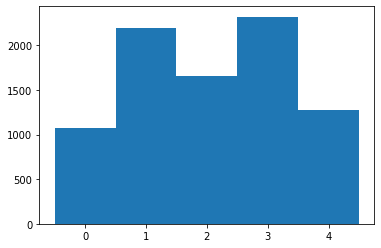

In [35]:
#plot sentiment histogram
plt.hist(reviews["Sentiment"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]);

#Natural Language Part

In [36]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=0485c91123999a65b3510cedbeed523fb0e3ff1d554ac8d262256a44700da665
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [37]:
from nltk.tokenize import word_tokenize

In [38]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [39]:
#NLP packs
import nltk
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
from stop_words import get_stop_words
#from textblob import TextBlob , Word
#import re 
#import string

In [40]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# lets talk about the lambda construct and apply

In [41]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x: word_tokenize(x)) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

# lets talk about stop words... and list comprehensions

In [ ]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

In [44]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x: [word for word in x if word not in STOPWORDS]) # stop words removal


# Frequency of words

In [49]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('film', 1150),
 ('movie', 969),
 ('story', 347),
 ('will', 265),
 ('good', 264),
 ('much', 263),
 ('even', 256),
 ('comedy', 249),
 ('characters', 233),
 ('time', 230)]

In [50]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x: [word for word in x if len(word) > 3]) # stop words removal


In [48]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('film', 1150),
 ('movie', 969),
 ('story', 347),
 ('will', 265),
 ('good', 264),
 ('much', 263),
 ('even', 256),
 ('comedy', 249),
 ('characters', 233),
 ('time', 230)]

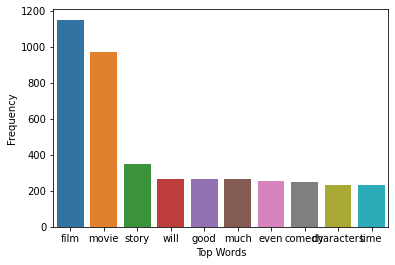

In [51]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
sns.barplot(x="Top Words",y="Frequency",data=words_freq);


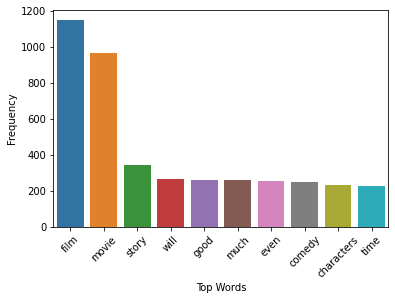

In [53]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


# Lets talk about the str.join() method

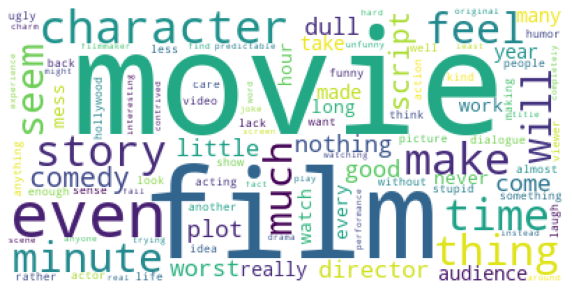

In [54]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")

#plot the word cloud for sentiment 0
wc(reviews[reviews["Sentiment"]==0]["Phrase"].sum(), bgcolor="white")

In [ ]:

#plot the word cloud for sentiment 4

# last step: sentiment analysis

In [ ]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.7 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
sid_obj = SentimentIntensityAnalyzer()
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [ ]:
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


In [ ]:
# calculate the sentiment for each review
# group the review by the Sentiment column value from the dataset
# plot on the x axis the Sentiment column [0, 1, 2, 3, 4]
# plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
# include the errorbar on the measured sentiment (use plt.errorbar to do this)
# hint: you may want to use a list comprehension to do this!